//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


<IPython.core.display.Javascript object>


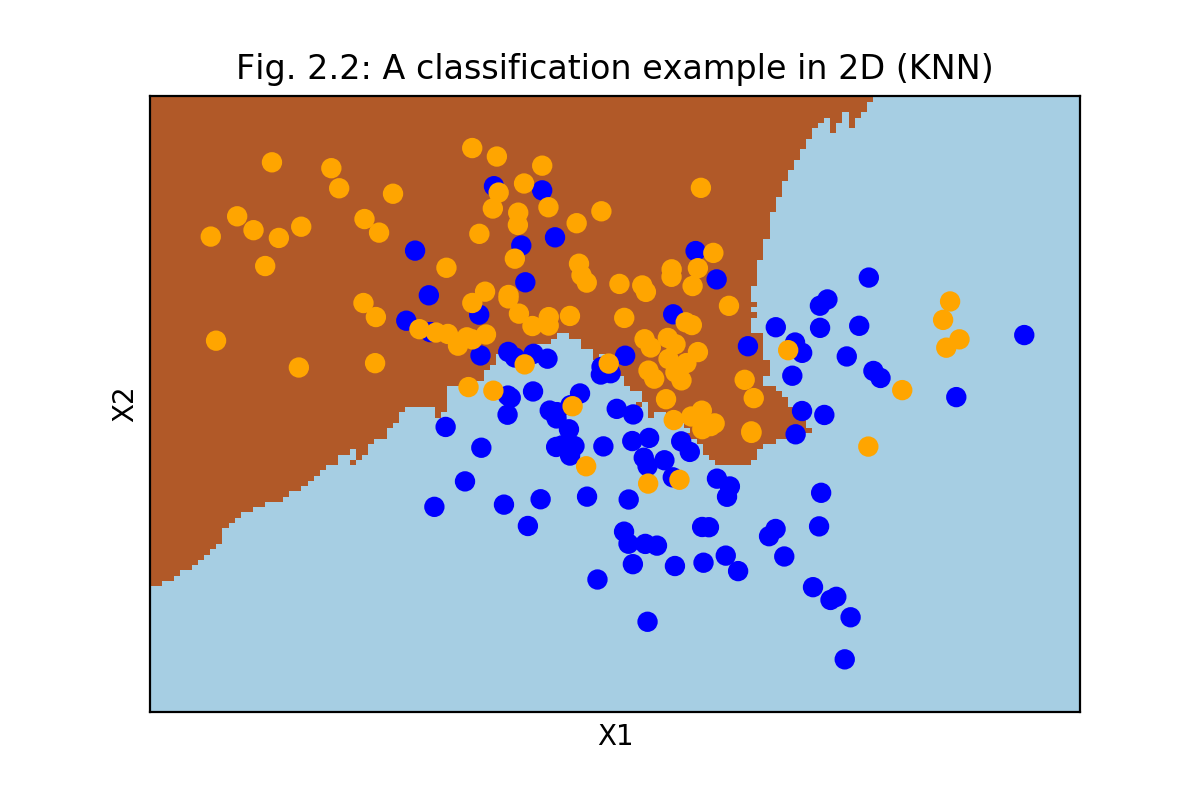

In [19]:
import rpy2.robjects as robjects
import pandas.rpy.common as com
import pandas as pd
from rpy2.robjects import pandas2ri
%matplotlib notebook
import matplotlib.pyplot as plt  # for scatter plot
from ggplot import *
from sklearn import neighbors
import numpy as np
pandas2ri.activate()

## load .RData and converts to pd.DataFrame
robj    = robjects.r.load("/Users/lasiadhi/Dropbox-2/Dropbox/Statistical_Learning/Chapter2/ESL.mixture.rda")
#myRData = com.load_data(robj)

for sets in robj:
    myRData = com.load_data(sets)

# load each table to seperate dataframes
marginal= pd.DataFrame(myRData['marginal'])
means   = pd.DataFrame(myRData['means'])
px1     = pd.DataFrame(myRData['px1'])
px2     = pd.DataFrame(myRData['px2'])
xnew    = pd.DataFrame(myRData['xnew'])
x       = pd.DataFrame(myRData['x'])
x.columns = ['x1', 'x2']
x.index = x.index - 1

y       = pd.DataFrame(myRData['y'])
y.columns = ['y']

mydata = x.join(y)

#KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
knn.fit(x, y) 

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = 0.05 #step size in the mesh
x_min, x_max = x['x1'].min() - .5, x['x1'].max() + .5
y_min, y_max = x['x2'].min() - .5, x['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
#plt.figure(figsize=(9,11))         # initialize figure
use_colours = {0: "blue", 1: "orange"}
plt.scatter(mydata['x1'],mydata['x2'], c=[use_colours[i] for i in y['y']], s=40)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Fig. 2.2: A classification example in 2D (KNN)")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()




